# SUPERVISED LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = pd.read_csv("/Users/Datasets/hallowenDataset/train.csv")
test_dataset = pd.read_csv("/Users/Datasets/hallowenDataset/test.csv")

In [3]:
train_dataset.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
from dateutil.parser import parse
from datetime import datetime


timeCol =train_dataset.instock_date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in timeCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    dayList.append(day)
    monthList.append(month)
    
    
for timestamp in timeCol:
    # Parse the timestamp string to datetime object
    dt = parse(timestamp)

    # Extract the hour from the datetime object
    hour = dt.hour

    # Determine the period of the day based on the hour
    if 5 <= hour < 12:
        period = 'Morning'
    elif 12 <= hour < 17:
        period = 'Afternoon'
    elif 17 <= hour < 21:
        period = 'Evening'
    else:
        period = 'Night'
        
    
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

train_dataset['month'] = monthList
train_dataset['day'] = dayList
train_dataset['period']= periodList
train_dataset.head()

6368 6368 6368


,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,month,day,period
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,Aug,Sat,Evening
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,Mar,Sun,Night
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,Aug,Tue,Evening
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,Mar,Mon,Night
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,Mar,Tue,Night


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
 15  month             6368 non-null   object 
 16  day               6368 non-null   object 


In [6]:
train_dataset.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
month                 0
day                   0
period                0
dtype: int64

# Data Cleaning

## Treat Missing Values

In [7]:
train_dataset.nunique()

Product_id          6368
Stall_no              50
instock_date        5350
Market_Category      248
Customer_name       5900
Loyalty_customer       2
Product_Category      10
Grade                  4
Demand               100
Discount_avail         2
charges_1            487
charges_2 (%)         17
Minimum_price       4236
Maximum_price       4618
Selling_Price       6321
month                 11
day                    7
period                 4
dtype: int64

In [8]:
train_dataset.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price', 'month', 'day',
       'period'],
      dtype='object')

In [9]:
train_dataset = train_dataset[['Product_id', 'Stall_no','month', 'day',
       'period', 'Market_Category','Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)','Minimum_price', 'Maximum_price', 'Selling_Price']]

## Check for multicolinarity

<AxesSubplot:>

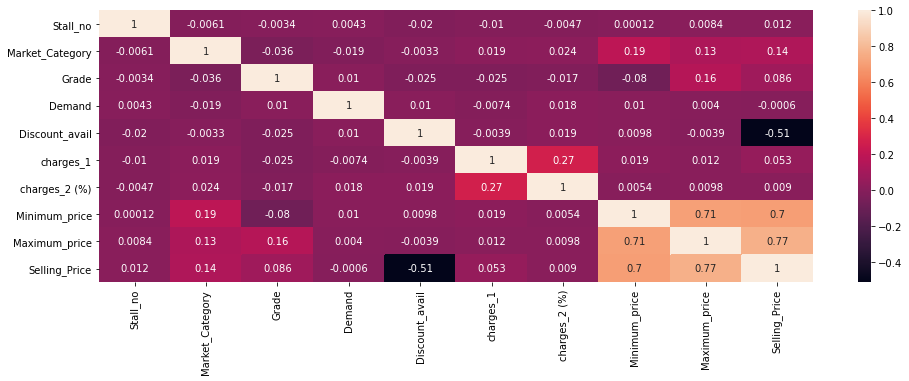

In [10]:
# correlation between attributes

pd.set_option('display.width', 100)

plt.figure(figsize=(16,5))

#sns. heatmap(data.corr())

sns.heatmap(train_dataset.corr(), annot= True)

In [13]:
train_dataset = train_dataset[['Product_id', 'Stall_no','month', 'day',
       'period', 'Market_Category','Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)', 'Selling_Price']]

In [11]:
train_dataset_remmmovena = train_dataset.dropna()
train_dataset_remmmovena.isna().sum()

Product_id          0
Stall_no            0
month               0
day                 0
period              0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

## check for Duplicates

In [12]:
train_dataset_remmmovena.duplicated().sum()

0

# EDA

In [15]:
train_dataset_remmmovena.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,25.254039,196.399102,0.651526,50.959785,0.146499,264.164452,10.138420,3545.337702,6479.423160,4568.205148
std,14.310436,169.292598,1.030911,29.088663,0.353638,124.181436,4.321275,2214.107161,3752.506849,3019.695512
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,124.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,162.000000,7.000000,1880.250000,3935.000000,2388.535826
50%,25.000000,124.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3171.000000,5681.500000,4216.580616
75%,37.000000,358.000000,2.000000,76.000000,0.000000,315.000000,14.000000,4721.000000,8182.750000,6213.924011
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


<Figure size 1440x1440 with 0 Axes>

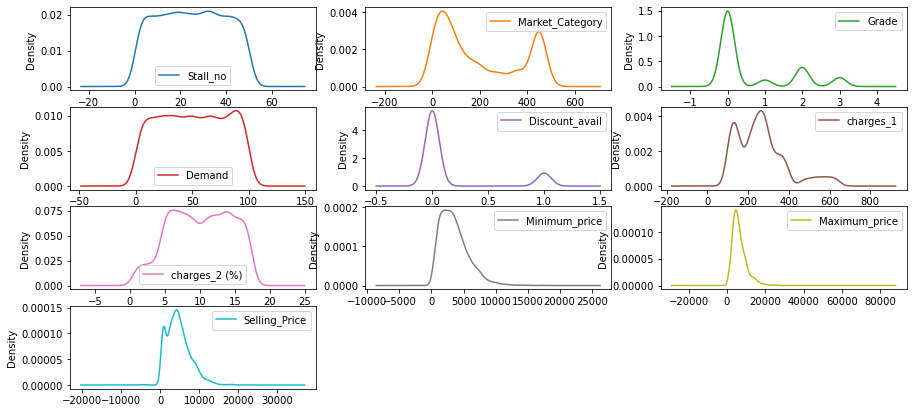

In [16]:
plt.figure(figsize=(20,20))

train_dataset_remmmovena.plot(kind='density', subplots=True, layout=(10,3), sharex=False)
plt.gcf().set_size_inches(15,18)
plt.show()

# Data Transformation

## Data Encoding